In [32]:
%load_ext autoreload
%autoreload 2
from tools import ScalarTool, VectorTool
import numpy as np
from copy import copy
from lit import *
import pickle
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt



def import_run(folder_path,Pe):
    if constraint == 'enstrophy':
        M = 106496
        pkl_file_path = folder_path + 'output-pe=%.1f' % Pe +'-M=%d' % M +'/pe=%.1f' % Pe + '-M=%d' % M +'.pkl'
    
    
    print('Pickle file path: '+ pkl_file_path)
    
    with open( pkl_file_path, 'rb') as f:
        sol = pickle.load(f, encoding='latin1')
    
    time = sol.hist_th_time
    th = sol.hist_th
    
    return [time, th]


def get_line_styling(n):
    style_list = ['-','--',':','-.'] 
    width_list = [1.5]
    

    style_width_pair_list = []
    for width in width_list:
        for style in style_list:
            style_width_pair = [style,width]
            style_width_pair_list.append(style_width_pair)

    return style_width_pair_list[n % len(style_width_pair_list)]

def deriv(t,f):
    
    dfdt = np.zeros(np.shape(f))
    for i in range(1,len(t)-1):
        dfdt[i]= (f[i+1] - f[i-1])/(t[i+1]-t[i-1])
    dfdt[0]= (f[1] - f[0])/(t[1]-t[0])   
    dfdt[-1]= (f[-1] - f[-2])/(t[-1]-t[-2])   
    return dfdt


def grayify_cmap(cmap):
    """Return a grayscale version of the colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived greyscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return cmap.from_list(cmap.name + "_grayscale", colors, cmap.N)

manuscript_image_folder = 'paper/'
constraint = 'enstrophy' # ... 'energy' or 'enstrophy'
colormap = plt.cm.tab10
fontsize = 10

if constraint == 'energy':
    folder_path ='/Volumes/Transcend/LIT_2_28_18_4PM_ENERGY/'
elif constraint == 'enstrophy':
    folder_path ='/Volumes/Transcend/LIT_2_28_18_4PM_ENSTROPHY/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
# Pe infinity case
L=1.0


pkl_file_path = folder_path + 'output-pe=inf-M=106496/pe=inf-M=106496.pkl'
print('Pickle file path: '+ pkl_file_path)

with open( pkl_file_path, 'rb') as f:
    sol = pickle.load(f, encoding='latin1')
    time_inf = sol.hist_th_time
    th_inf = sol.hist_th


# [time_inf,th_inf]= import_run('/Volumes/Transcend/LIT/',16384.0)

(tsteps,N_inf,_) = np.shape(th_inf)
print('Done loading pickle file.')
[hm1_inf,l2_inf,h1_inf]= compute_norms(th_inf,N_inf,L)
ind_inf = np.abs(l2_inf - l2_inf[0] - 10.0**(-6)).argmin()
print('(Truncating data when L2 error is near 10^-6) Truncation time: ',time_inf[ind_inf])
#     plot_norms(time[:ind],th[:ind],N,L , graph='log')
#     plt.show()


Pickle file path: /Volumes/Transcend/LIT_2_28_18_4PM_ENSTROPHY/output-pe=inf-M=106496/pe=inf-M=106496.pkl
Done loading pickle file.
(Truncating data when L2 error is near 10^-6) Truncation time:  7.4034423828125


In [26]:
ind_inf = len(time_inf)
print(ind_inf)

103


In [33]:
Pe_list = [128.0, 256.0, 512.0, 1024.0, 2048.0, 4096.0, 8192.0, 16384.0] 
L=1.0
    
ind_list = []
time_list = []
th_list = []
hm1_list=[]
l2_list=[]
h1_list=[]
N_list = []
tsteps_list = []

for Pe in Pe_list:
    print('%d'% Pe)
    [time,th] = import_run(folder_path,Pe)
    (tsteps,N,_) = np.shape(th)
    print('Done loading pickle file.')
    [hm1,l2,h1]= compute_norms(th,N,L)
    ind = np.abs(l2 - 10.0**(-12)).argmin()
    print('(Truncating data when L2 is near 10^-12) Truncation time: ',time[ind])
    #     plot_norms(time[:ind],th[:ind],N,L , graph='log')
    #     plt.show()
    
    #store info
    time_list.append(time)
    th_list.append(th)
    ind_list.append(ind)
    hm1_list.append(hm1)
    l2_list.append(l2)
    h1_list.append(h1)
    N_list.append(N)
    tsteps_list.append(tsteps)

128
Pickle file path: /Volumes/Transcend/LIT_2_28_18_4PM_ENSTROPHY/output-pe=128.0-M=106496/pe=128.0-M=106496.pkl
Done loading pickle file.
(Truncating data when L2 is near 10^-12) Truncation time:  13.0
256
Pickle file path: /Volumes/Transcend/LIT_2_28_18_4PM_ENSTROPHY/output-pe=256.0-M=106496/pe=256.0-M=106496.pkl
Done loading pickle file.
(Truncating data when L2 is near 10^-12) Truncation time:  13.0
512
Pickle file path: /Volumes/Transcend/LIT_2_28_18_4PM_ENSTROPHY/output-pe=512.0-M=106496/pe=512.0-M=106496.pkl
Done loading pickle file.
(Truncating data when L2 is near 10^-12) Truncation time:  13.0
1024
Pickle file path: /Volumes/Transcend/LIT_2_28_18_4PM_ENSTROPHY/output-pe=1024.0-M=106496/pe=1024.0-M=106496.pkl
Done loading pickle file.
(Truncating data when L2 is near 10^-12) Truncation time:  13.0
2048
Pickle file path: /Volumes/Transcend/LIT_2_28_18_4PM_ENSTROPHY/output-pe=2048.0-M=106496/pe=2048.0-M=106496.pkl
Done loading pickle file.
(Truncating data when L2 is near 10^-1

In [34]:
if constraint == 'enstrophy': 
    final_ind = len(Pe_list)
elif constraint == 'energy': 
    final_ind = len(Pe_list)-6


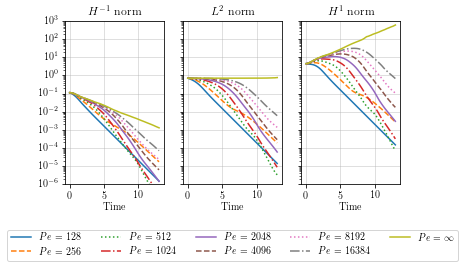

In [35]:
plt.figure(figsize = (7,6))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=fontsize)

pltnum = 0

f, axes = plt.subplots(1,3,figsize=(6.0,3),sharey = True)


for i in [0,1,2]:

    pltnum = 0
    color=iter(colormap(np.linspace(0,1,final_ind + 2)))
    for j in range(0,final_ind,1):
        time = time_list[j][:ind_list[j]]

        if i ==0:
            norm = hm1_list[j][:ind_list[j]] 
        elif i == 1:
            norm = l2_list[j][:ind_list[j]] 
        elif i == 2:
            norm = h1_list[j][:ind_list[j]] 

        [style, width]=get_line_styling(pltnum)
        c = next(color)
        axes[i].semilogy(time, norm,
                     label = '$Pe$ = %d'% Pe_list[j],
                     linewidth = width,
                     linestyle = style,
                     color = c)

        pltnum += 1 

    # ADD PE = \INFTY
    [style, width]=get_line_styling(pltnum)
    c = next(color)
    if i == 0:
        axes[i].semilogy(time_inf[:ind_inf], hm1_inf[:ind_inf],
                 label = '$Pe = \infty$',
                 linewidth = width,
                 linestyle = style,
                 color = c)
    elif i == 1:
        axes[i].semilogy(time_inf[:ind_inf], l2_inf[:ind_inf],
             label = '$Pe = \infty$',
             linewidth = width,
             linestyle = style,
             color = c)
    elif i == 2:
        #print('Infinity')
        axes[i].semilogy(time_inf[:ind_inf], h1_inf[:ind_inf],
         label = '$Pe = \infty$',
         linewidth = width,
         linestyle = style,
         color = c)

    axes[i].set_xlabel('Time')
    axes[i].grid(alpha=0.5)
    if constraint == 'energy':
        axes[i].set_ylim([10.**(-14),10.**(3)])
        axes[i].set_xlim([0,2])
    elif constraint == 'enstrophy':
        axes[i].set_ylim([10.**(-6),10.**(3)])


axes[1].legend(loc='upper center', bbox_to_anchor=(0.5,-0.25), ncol = 5)


axes[0].set_title('$H^{-1}$ norm')
axes[1].set_title('$L^{2}$ norm')
axes[2].set_title('$H^{1}$ norm')

#f.subplots_adjust(wspace = 0.05, bottom=0.0, left=0.0, top = 1.0, right=1.0)
#f.subplots_adjust(wspace = 0.15)
plt.savefig(manuscript_image_folder+constraint+'_norms.eps',dpi = 300, format = 'eps',bbox_inches='tight')
plt.show()

Pe = $\infty$
Pe =  2048.0


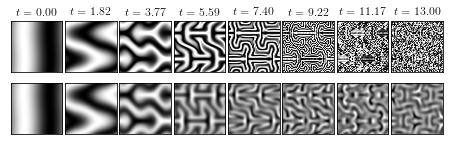

In [45]:
cmap = plt.cm.gray
#final_time = time_list[pe_ind][ind_list[pe_ind]]
if constraint == 'energy':
    pe_ind = 2
    final_time = (time_inf[ind_inf])*8./4.
else:
    pe_ind = 4
    #final_time = (time_inf[ind_inf])
    final_time = 13.0
num_frames = 8

print('Pe = $\infty$')
print('Pe = ',Pe_list[pe_ind ])
th_hist = th_list[pe_ind]
time = time_list[pe_ind]
times2plot = np.linspace(time[0],final_time,num_frames)
indicies2plot_u= [ np.abs(time_inf - times2plot[i]).argmin() for i in range(len(times2plot))] 
indicies2plot_l= [ np.abs(time - times2plot[i]).argmin() for i in range(len(times2plot))] 
#ind = np.abs(l2 - 10.0**(-12)).argmin()
#(tsteps,N,_) = np.shape(th_hist)
#st= ScalarTool(N,L)

plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=fontsize)

fig_width = 6
fig_height = 2.1*fig_width/num_frames

f, (axes_u,axes_l) = plt.subplots(2,len(indicies2plot_l),sharey = True,figsize=(fig_width,fig_height))
if constraint == 'energy':
    end_ind_u=ind_inf
else:
    end_ind_u=indicies2plot_u[-1]
    
for i,index in enumerate(indicies2plot_u):
    if index <= end_ind_u:
        im = axes_u[i].imshow(np.transpose(th_inf[index]),
                        cmap=cmap,
                        extent=(0, L, 0, L),
                        origin="lower",
                             vmin = -1.0,
                             vmax = 1.0)
    else:
        axes_u[i].get_xaxis().set_visible(False)
        axes_u[i].get_yaxis().set_visible(False)
        axes_u[i].axis('off')
        
    axes_u[i].set_xticks([])
    axes_u[i].set_yticks([])
    
    

    
    
for i,index in enumerate(indicies2plot_l):
    im = axes_l[i].imshow(np.transpose(th_list[pe_ind ][index]),
                    cmap=cmap,
                    extent=(0, L, 0, L),
                    origin="lower")
    axes_l[i].set_xticks([])
    axes_l[i].set_yticks([])
    #axes_l[i].set_title('$t = %.2f $' % time[index])
    axes_u[i].set_title('$t = %.2f $' % time[index])

f.subplots_adjust(wspace = 0.05, bottom=0.0, left=0.0, top = 1.0, right=1.0)
plt.savefig(manuscript_image_folder+ constraint+'_film.eps',dpi = 300, format = 'eps',bbox_inches='tight')


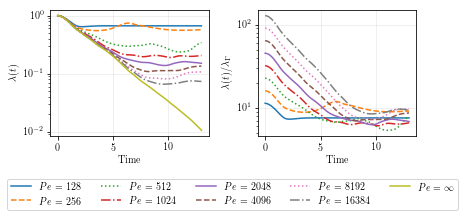

In [37]:
fontsize = 10
fig, axes = plt.subplots(1,2,figsize = (6,2.5))
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=fontsize)


pltnum = 0
# colormap = plt.cm.Dark2_r
# colormap = plt.cm.nipy_spectral

color=iter(colormap(np.linspace(0,1,final_ind + 2)))

for i in range(0,final_ind,1):
    time = time_list[i][:ind_list[i]]
    hm1 = hm1_list[i][:ind_list[i]]
    l2 = l2_list[i][:ind_list[i]]
    length = 2*np.pi*hm1/l2
    [style, width]=get_line_styling(pltnum)
    c = next(color)
    pltnum +=1
    axes[0].semilogy(time, length,
                 label = '$Pe$ = %d'% Pe_list[i],
                 linewidth = width,
                 linestyle = style,
                 color = c)
    axes[0].grid(alpha=0.5)
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('$\lambda (t)$')
    axes[0].legend()

# Pe infinity
length_inf = 2*np.pi*hm1_inf/l2_inf
[style, width]=get_line_styling(pltnum)
pltnum +=1
c = next(color)
axes[0].semilogy(time_inf[:ind_inf], length_inf[:ind_inf],
         label = '$Pe = \infty$',
         linewidth = width,
         linestyle = style,
         color = c)
axes[0].grid(alpha=0.25)
axes[0].set_xlabel('Time')
axes[0].set_ylabel('$\lambda (t)$')
#axes[0].legend()

pltnum = 0

#colormap = grayify_cmap(plt.cm.Dark2_r)

color=iter(colormap(np.linspace(0,1,final_ind + 2)))

for i in range(0,final_ind,1):
    time = time_list[i][:ind_list[i]]
    hm1 = hm1_list[i][:ind_list[i]]
    l2 = l2_list[i][:ind_list[i]]
    length = 2*np.pi*hm1/l2
    [style, width]=get_line_styling(pltnum)
    c = next(color)
    if constraint == 'energy':
        length_scaled = length*Pe_list[i]
    elif constraint == 'enstrophy':
        length_scaled = length*Pe_list[i]**0.5
    axes[1].semilogy(time, length_scaled,
                 label = '$Pe$= %d'% Pe_list[i],
                 linewidth = width,
                 linestyle = style,
                 color = c)
    axes[1].grid(alpha=0.25)
    axes[1].set_xlabel('Time')
    if constraint == 'energy':
        axes[1].set_ylabel('$\lambda (t) / \lambda_{U}$')
    elif constraint == 'enstrophy':
        axes[1].set_ylabel('$\lambda (t) / \lambda_{\Gamma}$')
    #axes[1].legend()
    pltnum +=1


axes[0].legend(loc='upper center', bbox_to_anchor=(1.15,-0.3), ncol = 5)

plt.tight_layout()

plt.savefig(manuscript_image_folder+constraint+'_length.eps',dpi = 300, format = 'eps',bbox_inches='tight')


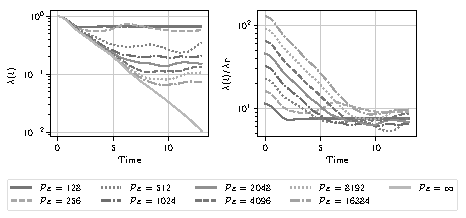

In [38]:
from PIL import Image
filename = manuscript_image_folder+constraint+'_length.eps'
filename_bw = manuscript_image_folder+constraint+'_length_bw.eps'
Image.open(filename).convert('L').save(filename_bw,dpi=(2000,2000))
Image.open(filename_bw)

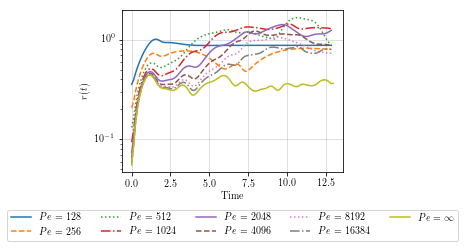

In [39]:

if constraint =='enstrophy':

    plt.figure(figsize = (4,3))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif', size=fontsize)

    pltnum = 0
    color=iter(colormap(np.linspace(0,1,final_ind + 2)))

    for i in range(0,final_ind,1):
        time = time_list[i][:ind_list[i]]
        hm1 = hm1_list[i][:ind_list[i]]
        l2 = l2_list[i][:ind_list[i]]
        exprate = deriv(time,hm1)/hm1
        [style, width]=get_line_styling(pltnum)
        c = next(color)
        pltnum +=1
        rate = -exprate[1:-1]
        plt.semilogy(time[1:-1], 
                     rate,
                     label = '$Pe$ = %d'% Pe_list[i],
                     linewidth = width,
                     linestyle = style,
                     color = c)
        plt.grid(alpha=0.5)
        plt.xlabel('Time')
        plt.ylabel('$r(t)$')
        plt.legend()

    time = time_inf[:ind_inf]
    exprate = deriv(time_inf[:ind_inf],hm1_inf[:ind_inf])/hm1_inf[:ind_inf]
    [style, width]=get_line_styling(pltnum)
    c = next(color)
    pltnum +=1
    rate = -exprate[1:-1]
    plt.semilogy(time[1:-1], 
                 rate,
                 label = '$Pe =\infty$ ' ,
                 linewidth = width,
                 linestyle = style,
                 color = c)
    plt.grid(alpha=0.5)
    plt.xlabel('Time')
    plt.ylabel('$r(t)$')
    #plt.legend()
    plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.2), ncol = 5)


if constraint =='energy':
    fig, axes = plt.subplots(1,2,figsize = (6.0,3))
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif', size=fontsize)

    pltnum = 0
    color=iter(colormap(np.linspace(0,1,final_ind + 2)))

    for i in range(0,final_ind,1):
        time = time_list[i][:ind_list[i]]
        hm1 = hm1_list[i][:ind_list[i]]
        l2 = l2_list[i][:ind_list[i]]
        #exprate = deriv(time,l2)/l2
        exprate = deriv(time,hm1)/hm1
        [style, width]=get_line_styling(pltnum)
        c = next(color)
        pltnum +=1
        rate = -exprate[1:-1]
        axes[0].semilogy(time[1:-1], -exprate[1:-1],
                     label = '$Pe$ = %d'% Pe_list[i],
                     linewidth = width,
                     linestyle = style,
                     color = c)
        axes[0].grid(alpha=0.5)
        axes[0].set_xlabel('Time')
        axes[0].set_ylabel('$r(t)$')
        axes[0].legend()

    time = time_inf[:ind_inf]
    exprate = deriv(time_inf[:ind_inf],hm1_inf[:ind_inf])/hm1_inf[:ind_inf]
    [style, width]=get_line_styling(pltnum)
    c = next(color)
    pltnum +=1
    rate = -exprate[1:-1]
    axes[0].semilogy(time[1:-1], -exprate[1:-1],
                 label = '$Pe =\infty$ ',
                 linewidth = width,
                 linestyle = style,
                 color = c)
    axes[0].grid(alpha=0.5)
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('$r(t)$')
    #axes[0].legend()

    pltnum = 0
    color=iter(colormap(np.linspace(0,1,final_ind + 2)))

    for i in range(0,final_ind,1):
        time = time_list[i][:ind_list[i]]
        hm1 = hm1_list[i][:ind_list[i]]
        l2 = l2_list[i][:ind_list[i]]
        exprate = deriv(time,hm1)/hm1
        [style, width]=get_line_styling(pltnum)
        c = next(color)
        pltnum +=1
        axes[1].semilogy(time[1:-1], -exprate[1:-1]/Pe_list[i],
                     label = '$Pe$ = %d'% Pe_list[i],
                     linewidth = width,
                     linestyle = style,
                     color = c)
        axes[1].grid(alpha=0.5)
        axes[1].set_xlabel('Time')
        axes[1].set_ylabel('$r(t)/r_{U}$')
        #axes[1].legend()

    axes[0].legend(loc='upper center', bbox_to_anchor=(1.2,-0.2), ncol = 4)
plt.tight_layout()
plt.savefig(manuscript_image_folder+constraint+'_rate.eps', dpi = 300, format = 'eps',bbox_inches='tight')


In [40]:
print(plt.style.available)

['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2']


In [41]:
def movie(time, scalar_hist, N, L, output_path='output/'):
    os.system('mkdir ' + output_path)
    os.system('mkdir ' + output_path + 'images/')
    st = ScalarTool(N, L)
    # st.plot(scalar_hist[i])
    # plt.savefig(outputPath + "image%.4d.png" % i, format='png')
    

    for i in range(len(time)):
        fig = plt.figure()
        st.plot(np.real(scalar_hist[i]),high_quality = True)
        plt.title('Time = %.3f' % time[i])
        plt.savefig(output_path + 'images/' + "image%.4d.png" %
                    i, format='png', dpi =300)
        # plt.savefig("image.png", format='png')
        plt.close(fig)

    os.system("ffmpeg -y -framerate 20 -i " + output_path + 'images/'
              "image%04d.png -c:v libx264 -pix_fmt yuv420p " + output_path + "movies.mp4")




In [42]:

final_time =2
time_1 = time_inf[time_inf <= final_time]
scalar_hist_1=  th_inf[time_inf <= final_time]
movie(time_1, scalar_hist_1, N_inf, 1.0, output_path='output/')

TypeError: '<=' not supported between instances of 'list' and 'int'

In [ ]:
i = 8


final_time = 2
time_1 = time_inf[time_inf <= final_time]
indicies2plot= [ np.abs(time_list[i] - time_inf[n]).argmin() for n in range(len(time_inf))] 
time_2 = time_list[i][indicies2plot]

L=1.0
shrink = 0.8
cmap=plt.cm.gray
output_path = 'output_side_by_side/'
scalar_hist_1=  th_inf[time_inf <= final_time]
scalar_hist_2=  th_list[i][indicies2plot]
Pe2 = Pe_list[i]





os.system('mkdir ' + output_path + 'images/')

for k in range(len(time_1)):
    

    fig, axes = plt.subplots(figsize = (8, 4), nrows=1, ncols=2)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif', size=12)

    im = axes[0].imshow(np.transpose(scalar_hist_1[k]),
                    cmap=cmap,
                    extent=(0, L, 0, L),
                    origin="lower",
                       vmin=-1,vmax=1)
    axes[0].set_xticks([])
    axes[0].set_yticks([])
    axes[0].set_title('$ Pe = \infty$')
    fig.colorbar(im, ax=axes[0], shrink = shrink)

    im = axes[1].imshow(np.transpose(scalar_hist_2[k]),
                    cmap=cmap,
                    extent=(0, L, 0, L),
                    origin="lower")
    axes[1].set_xticks([])
    axes[1].set_yticks([])
    axes[1].set_title('$ Pe = %d $' % Pe2)

    fig.colorbar(im, ax=axes[1], shrink = shrink)

    plt.suptitle('Time = %.3f' % time_1[k])


    plt.savefig(output_path + 'images/' + "image%.4d.png" %
               k, format='png',dpi = 300)
    plt.show()
    plt.close(fig)

os.system("ffmpeg -y -framerate 20 -i " + output_path + 'images/'
      "image%04d.png -c:v libx264 -pix_fmt yuv420p " + output_path + "movies.mp4")


In [ ]:
np.allclose(time_inf,time_list[j])

In [ ]:
print(time_inf)
print(time_list[j])

# Movies 

In [ ]:
from post_processing import *
i=8
movie(time_list[i], th_list[i], N_list[i], 1.0, output_path='output/')

In [ ]:
final_time = 2
time_1 = time[time <= final_time]
indicies2plot= [ np.abs(time_list[i] - time[n]).argmin() for n in range(len(time))] 
time_2 = time_list[i][indicies2plot]

In [ ]:
indicies2plot

In [ ]:
indicies2plot

In [ ]:
# plt.semilogy(time_inf[time_inf<2.0],abs(l2_inf[time_inf<2.0] - l2_inf[0]))
plt.plot(time_inf[time_inf<2.0],l2_inf[time_inf<2.0])

plt.show()

In [ ]:
time_inf[ind_inf]

In [ ]:
os.system("ffmpeg -y -framerate 10 -i " + output_path + 'images/'
      "image%04d.png -c:v libx264 -pix_fmt yuv420p " + output_path + "movies.mp4")
